<a href="https://colab.research.google.com/github/sugiyama404/ReinfoceLearningForTrading/blob/main/make_data_analysys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
import copy

import seaborn as sns

drive.mount('/content/drive/')
exp_dir = 'Colab Notebooks/workspace/export/'

random_path = '/content/drive/My Drive/' + exp_dir + 'random_test.csv'
qlearning_path = '/content/drive/My Drive/' + exp_dir + 'qlearning_test.csv'
sarsa_path = '/content/drive/My Drive/' + exp_dir + 'sarsa_test.csv'
a2c_path = '/content/drive/My Drive/' + exp_dir + 'a2c_test.csv'
a3c_path = '/content/drive/My Drive/' + exp_dir + 'a3c_test.csv'
w_qlearning_path = '/content/drive/My Drive/' + exp_dir + 'w_qlearning_test.csv'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
df_r = pd.read_csv(random_path)
df_q = pd.read_csv(qlearning_path)
df_s = pd.read_csv(sarsa_path)
df_a2c = pd.read_csv(a2c_path)
df_a3c = pd.read_csv(a3c_path)
df_wq = pd.read_csv(w_qlearning_path)
df_r_1 = df_r.drop("Unnamed: 0", axis=1)
df_q_1 = df_q.drop("Unnamed: 0", axis=1)
df_s_1 = df_s.drop("Unnamed: 0", axis=1)
df_a2c_1 = df_a2c.drop("Unnamed: 0", axis=1)
df_a3c_1 = df_a3c
df_wq_1 = df_wq.drop("Unnamed: 0", axis=1)
df_r_1['WinRate'] = df_r_1['TradeWin'] / df_r_1['TradeTimes'] * 100
df_q_1['WinRate'] = df_q_1['TradeWin'] / df_q_1['TradeTimes'] * 100
df_s_1['WinRate'] = df_s_1['TradeWin'] / df_s_1['TradeTimes'] * 100
df_a2c_1['WinRate'] = df_a2c_1['TradeWin'] / df_a2c_1['TradeTimes'] * 100
df_a3c_1['WinRate'] = df_a3c_1['TradeWin'] / df_a3c_1['TradeTimes'] * 100
df_wq_1['WinRate'] = df_wq_1['TradeWin'] / df_wq_1['TradeTimes'] * 100

df_r_1['WinRate'] = df_r_1['WinRate'].fillna(0)
df_q_1['WinRate'] = df_q_1['WinRate'].fillna(0)
df_s_1['WinRate'] = df_s_1['WinRate'].fillna(0)
df_a2c_1['WinRate'] = df_a2c_1['WinRate'].fillna(0)
df_a3c_1['WinRate'] = df_a3c_1['WinRate'].fillna(0)
df_wq_1['WinRate'] = df_wq_1['WinRate'].fillna(0)

df_r_1['WinRate'] = df_r_1['WinRate'].round(2)
df_q_1['WinRate'] = df_q_1['WinRate'].round(2)
df_s_1['WinRate'] = df_s_1['WinRate'].round(2)
df_a2c_1['WinRate'] = df_a2c_1['WinRate'].round(2)
df_a3c_1['WinRate'] = df_a3c_1['WinRate'].round(2)
df_wq_1['WinRate'] = df_wq_1['WinRate'].round(2)

df_r_1['FixedProfitRate'] = df_r_1['FixedProfit'] /1000000 * 100
df_q_1['FixedProfitRate'] = df_q_1['FixedProfit'] /1000000 * 100
df_s_1['FixedProfitRate'] = df_s_1['FixedProfit'] /1000000 * 100
df_a2c_1['FixedProfitRate'] = df_a2c_1['FixedProfit'] /1000000 * 100
df_a3c_1['FixedProfitRate'] = df_a3c_1['FixedProfit'] /1000000 * 100
df_wq_1['FixedProfitRate'] = df_wq_1['FixedProfit'] /1000000 * 100

df_r_1['FixedProfitRate'] = df_r_1['FixedProfitRate'].fillna(0)
df_q_1['FixedProfitRate'] = df_q_1['FixedProfitRate'].fillna(0)
df_s_1['FixedProfitRate'] = df_s_1['FixedProfitRate'].fillna(0)
df_a2c_1['FixedProfitRate'] = df_a2c_1['FixedProfitRate'].fillna(0)
df_a3c_1['FixedProfitRate'] = df_a3c_1['FixedProfitRate'].fillna(0)
df_wq_1['FixedProfitRate'] = df_wq_1['FixedProfitRate'].fillna(0)

df_r_1['FixedProfitRate'] = df_r_1['FixedProfitRate'].round(2)
df_q_1['FixedProfitRate'] = df_q_1['FixedProfitRate'].round(2)
df_s_1['FixedProfitRate'] = df_s_1['FixedProfitRate'].round(2)
df_a2c_1['FixedProfitRate'] = df_a2c_1['FixedProfitRate'].round(2)
df_a3c_1['FixedProfitRate'] = df_a3c_1['FixedProfitRate'].round(2)
df_wq_1['FixedProfitRate'] = df_wq_1['FixedProfitRate'].round(2)


del df_r_1['FixedProfit']
del df_r_1['TradeTimes']
del df_r_1['TradeWin']
del df_q_1['FixedProfit']
del df_q_1['TradeTimes']
del df_q_1['TradeWin']
del df_s_1['FixedProfit']
del df_s_1['TradeTimes']
del df_s_1['TradeWin']
del df_a2c_1['FixedProfit']
del df_a2c_1['TradeTimes']
del df_a2c_1['TradeWin']
del df_a3c_1['FixedProfit']
del df_a3c_1['TradeTimes']
del df_a3c_1['TradeWin']
del df_wq_1['FixedProfit']
del df_wq_1['TradeTimes']
del df_wq_1['TradeWin']
df_wq_1

,WinRate,FixedProfitRate
0,83.33,152.51
1,100.00,154.58
2,100.00,154.10
3,100.00,153.72
4,100.00,153.05
...,...,...
95,100.00,154.40
96,100.00,155.70
97,100.00,151.33
98,80.00,148.37


In [3]:
df_a = pd.DataFrame(columns=['random', 'qlearning', 'sarsa', 'a2c', 'a3c','w_qlearning'])
df_a['random'] = df_r_1['FixedProfitRate']
df_a['qlearning'] = df_q_1['FixedProfitRate']
df_a['sarsa'] = df_s_1['FixedProfitRate']
df_a['a2c'] = df_a2c_1['FixedProfitRate']
df_a['a3c'] = df_a3c_1['FixedProfitRate']
df_a['w_qlearning'] = df_wq_1['FixedProfitRate']

df_b = pd.DataFrame(columns=['random', 'qlearning', 'sarsa', 'a2c', 'a3c','w_qlearning'])
df_b['random'] = df_r_1['WinRate']
df_b['qlearning'] = df_q_1['WinRate']
df_b['sarsa'] = df_s_1['WinRate']
df_b['a2c'] = df_a2c_1['WinRate']
df_b['a3c'] = df_a3c_1['WinRate']
df_b['w_qlearning'] = df_wq_1['WinRate']

dfTa_melt = pd.melt(df_a)
dfTa_melt['species'] = 'FixedProfitRate'

dfAt_melt = pd.melt(df_b)
dfAt_melt['species'] = 'WinRate'

df = pd.concat([dfAt_melt, dfTa_melt], axis=0)
df

,variable,value,species
0,random,63.33,WinRate
1,random,63.87,WinRate
2,random,60.96,WinRate
3,random,59.88,WinRate
4,random,63.33,WinRate
...,...,...,...
595,w_qlearning,154.40,FixedProfitRate
596,w_qlearning,155.70,FixedProfitRate
597,w_qlearning,151.33,FixedProfitRate
598,w_qlearning,148.37,FixedProfitRate


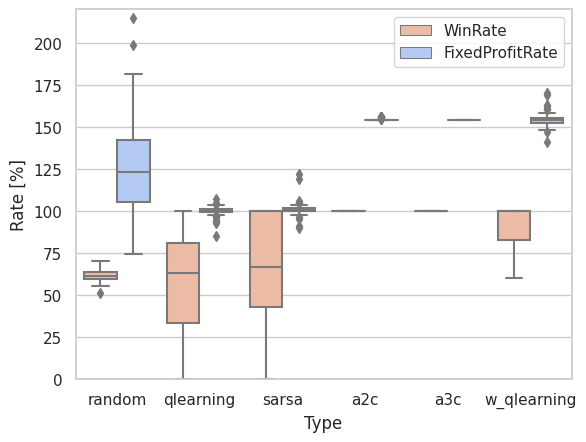

In [4]:
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set3')


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='variable', y='value', data=df, hue='species', palette='coolwarm_r', ax=ax)


ax.set_xlabel('Type')
ax.set_ylabel('Rate [%]')
ax.set_ylim(0, 220)
ax.legend()

plt.show()